# Dataset Investigation

By Anas A. Mohaisin

We are investigating dataset for released Movies for the period of (1966-2015). 
This dataset includes the IMDB (Internet Movie Database) such as rating, released date, cast, etc. It also includes 
financial information about Revenue and Budget for the same period.

In [3]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.getcwd()

In [4]:
folder_name='mydata'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [360]:
#Import dataset

df=pd.read_csv('./mydata/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [361]:
df.shape 

(10866, 21)

We have 10866 records(rows) & 20 columns

In [362]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [363]:
sum(df.duplicated())

1

In [364]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

We have removed the duplication

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  objec

Variables with missing values: (imdb_id,cast,homepage,tagline,keywords,overview,genres,production_companies)

In [121]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [365]:
df['genres'] = df['genres'].fillna('none')
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [366]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

Removing 'NAN' values will remove the other financial values, e.g. Revenue which, necessarily, reduces the overall Revenue. Thus, we have chosen to keep the missing values and replace Genres missing values with "None" as a new genre to make a fair comparison between different types of genres

In [367]:
df.groupby('genres').mean().popularity.nlargest()

genres
Adventure|Science Fiction|Thriller                   13.112507
Adventure|Drama|Science Fiction                      12.699699
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Western|Drama|Adventure|Thriller                      9.110700
Name: popularity, dtype: float64

We found that Genre Action|Adventure|Science Fiction|Thriller has the most popularity rate i.e. this Genre is associated with higher popularity.

In [368]:
df.describe().vote_average

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [369]:
bin_edges = [1.5, 5.4, 6, 6.6, 9.2] 
bin_names = ['Very High', 'High', 'Medium','Low']

df['rate'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rate
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Medium
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Low
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Medium
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Low


In [370]:
df['rate'].value_counts()

Very High    2887
Medium       2737
High         2661
Low          2578
Name: rate, dtype: int64

In [292]:
df[['genres','rate','release_year']].query('rate == "Very High"')

,genres,rate,release_year
original_title,,,
Jupiter Ascending,Science Fiction|Fantasy|Action|Adventure,Very High,2015
Fifty Shades of Grey,Drama|Romance,Very High,2015
Wild Card,Thriller|Crime|Drama,Very High,2015
Mortdecai,Comedy|Adventure,Very High,2015
Blackhat,Mystery|Crime|Action|Thriller|Drama,Very High,2015
...,...,...,...
Attack of the Killer Tomatoes!,Comedy|Horror|Science Fiction,Very High,1978
KISS Meets the Phantom of the Park,Science Fiction|TV Movie,Very High,1978
Return of the Seven,Action|Western,Very High,1966


We have created a new column where we classified the Average vote, i.e. Rate from "Very high" to "Low" based on minimum, 1st quartile, 2nd quartile, 3rd quartile, and the maximum. 
Thus, we found that Genre Science Fiction|Fantasy|Action|Adventure has the Highest Rate, which is "Very High".

On the light of the above two Genre analysis, we found a different base to evaluate the Genre Popularity & Rate et ceteris paribus such as time of release.

$$
y=f(x_1,x_2,x_3)
\\
$$
where:

$y$=revenue, 
$x_1$=budget,
$x_2$=vote_average,
$x_3$=popularity

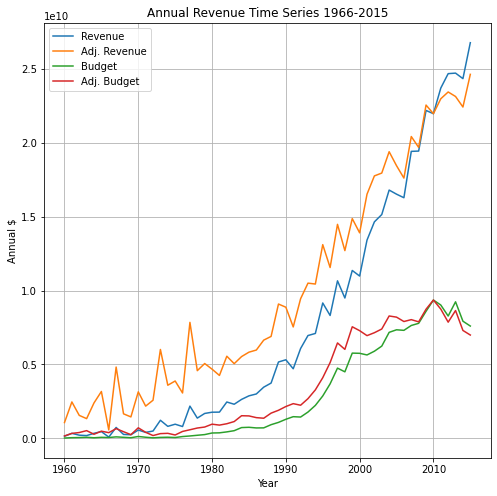

In [385]:
gr=df.groupby("release_year")
plt.figure(figsize=(8,8))
plt.plot(gr[['revenue','revenue_adj','budget','budget_adj']].sum())
plt.title('Annual Revenue Time Series 1966-2015')
plt.ylabel('Annual $')
plt.xlabel('Year')
plt.grid(True)
plt.legend(["Revenue", "Adj. Revenue","Budget","Adj. Budget"])
plt.show()

Fluctuation in Revenue & Budget can be interpreted:
\
1-Simultaneous increase in Revenue and Budget. \
2-The Revenue fluctuation before 2000 shows a big gap between Revenue and Adjusted Revenue, where the Adjusted Revenue is higher that Revenue.\
3- During the period of (1990-200) the Adjusted Budget exceeded the Budget.\
4- In (2000) there were no difference between Adjusted and Revenue/Budget.\
5- After (2000) Revenue & Budget were higher that Ajusted.

In [374]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['weekday']= df['release_date'].dt.day_name()
df['month'] = df['release_date'].dt.month_name()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rate,weekday,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Medium,Tuesday,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Low,Wednesday,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Medium,Wednesday,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Low,Tuesday,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Low,Wednesday,April


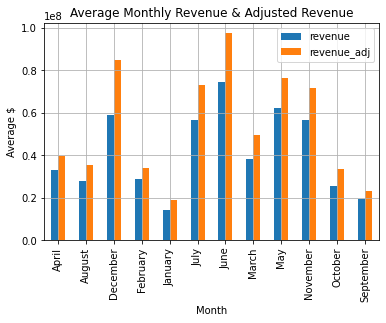

In [375]:
df[['revenue','revenue_adj','month']].groupby("month").mean().plot(kind='bar',grid=True,xlabel='Month',ylabel='Average $',title='Average Monthly Revenue & Adjusted Revenue');

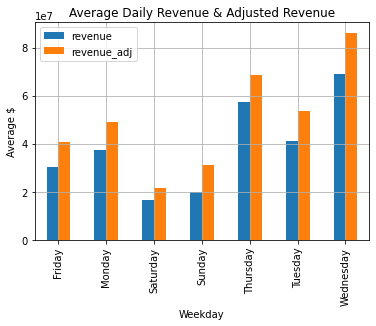

In [376]:
df[['revenue','revenue_adj','weekday']].groupby("weekday").mean().plot(kind='bar',grid=True,xlabel='Weekday',ylabel='Average $',title='Average Daily Revenue & Adjusted Revenue');

Historical information about monthly and daily revenues would help the decision-maker(s) to plan ahead of the released date, cinema theatres, security, et cetera. 
Monthly average Revenue shows that June has the highest Revenue comparing to other months. Daily average Revenue shows that Wednesday has the highest Revenue comparing to the other days.

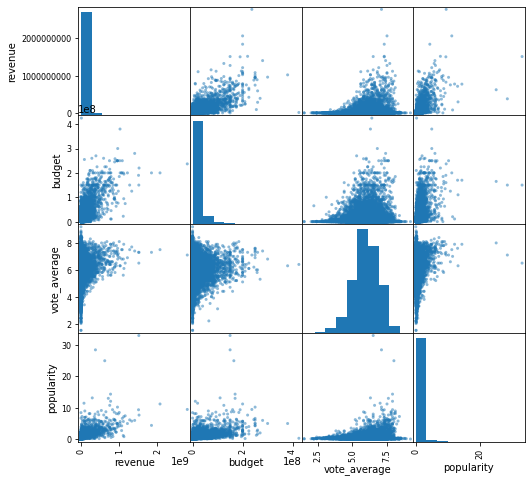

In [377]:
pd.plotting.scatter_matrix(df[['revenue','budget','vote_average','popularity']], figsize=(8,8));

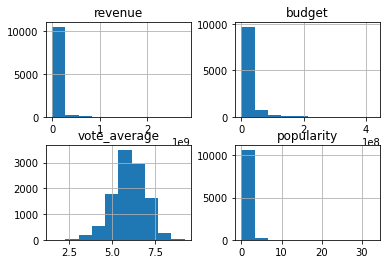

In [378]:
df[['revenue','budget','vote_average','popularity']].hist();

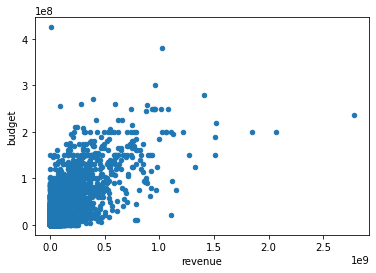

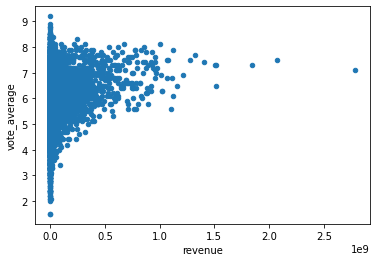

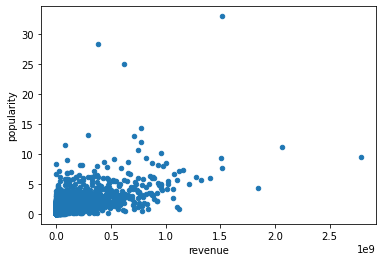

In [380]:
df_plot=df[['budget','vote_average','popularity']]

for i in df_plot:
    df.plot(x='revenue',y=i,kind='scatter');

In [381]:
df[['revenue','budget','vote_average','popularity']].corr()    

,revenue,budget,vote_average,popularity
revenue,1.000000,0.734928,0.172541,0.663360
budget,0.734928,1.000000,0.081067,0.545481
vote_average,0.172541,0.081067,1.000000,0.209517
popularity,0.663360,0.545481,0.209517,1.000000


Mathematically:
$$
y=f(x_1,x_2,x_3)
\\
$$
where:

$y$=revenue, 
$x_1$=budget,
$x_2$=vote_average,
$x_3$=popularity

Changes in the $y$ as a dependent because of the changes in the independent variables $(x_1,x_2,x_3)$, help the decision maker(s) to shed the light on the reasons behind changes in $y$ et ceteris paribus.

Graph base analysis shows that Revenue, Budget, & Popularity are skewed to the right while the Vote Average (Rate) is left-skewed. Scatter plots do not depict linear correlation. However, Scatter plots show positive correlation between the dependent & independent variables. The correlation matrix shows:
\\
1-Revenue is positively and highly correlated with Budget 73%.\
2-Revenue is positively and weekly correlated with Average Vote 17%.\
3-Revenue is positively and moderate correlated with Popularity 54%.\